In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 

In [24]:
def f(t):
    t=np.array(t)
    return 1/(1+t**2)

def taninv(t):
    inverse=[]
    for i in range(0,len(t)):
        inverse.append(quad(f,0,t[i])[0])
    return np.array(inverse)

def vectorinv(t):
    h= t[1]-t[0]
    fvec= f(t)
    return h*(np.cumsum(fvec)-0.5*(fvec[0])-0.5*fvec)

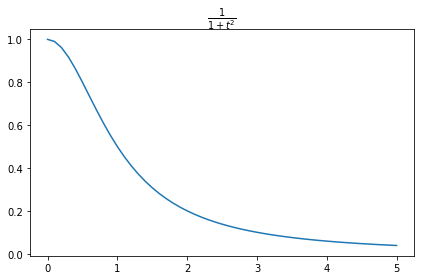

In [25]:
t= np.arange(0,5.1,0.1)
plt.figure()
plt.plot(t,f(t))
plt.title(r"$\frac{1}{1+t^2}$",fontsize=14)
plt.tight_layout()
plt.show()

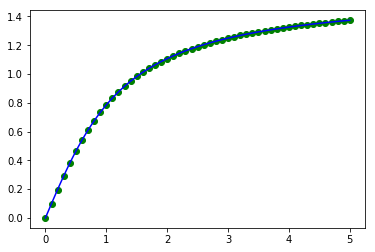

In [26]:
plt.figure()
plt.plot(t,np.arctan(t),"go")
inverse=taninv(t)
plt.plot(t,inverse,"b-")

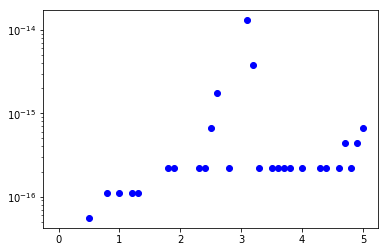

In [27]:
plt.figure()
plt.semilogy(t,abs(inverse-np.arctan(t)),"bo")

9 9


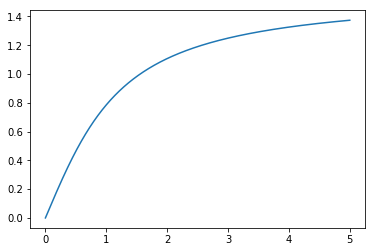

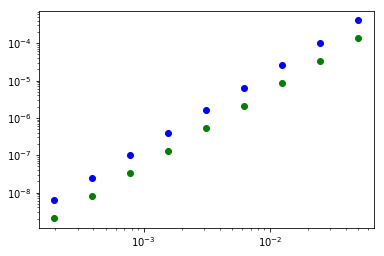

In [31]:

h=0.1
t=np.arange(0,5,h)
error=1
list1=[]
list2=[]
list3=[]
inverse1=vectorinv(t)

while error> 1e-8:
    h=h/2
    t=np.arange(0,5,h)
    inverse2= vectorinv(t)
    error= max(abs(inverse2[::2]-inverse1))
    list1.append(h)
    list2.append(error)
    list3.append(max(abs(inverse2-np.arctan(t))))
    inverse1=inverse2
print (len(list1),len(list2))
plt.plot(t,vectorinv(t))
plt.figure()
plt.loglog(list1,list2,"bo")
plt.loglog(list1,list3,"go")